In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def load(image_path):
    out = io.imread(image_path)
    return out

def display_large(img, title=None):
    # Show image
    plt.figure(figsize = (20,20))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [2]:
image = load('~/Downloads/THIScreen_Shot_2021-09-13_at_10.22.02_PM-removebg-preview.png')

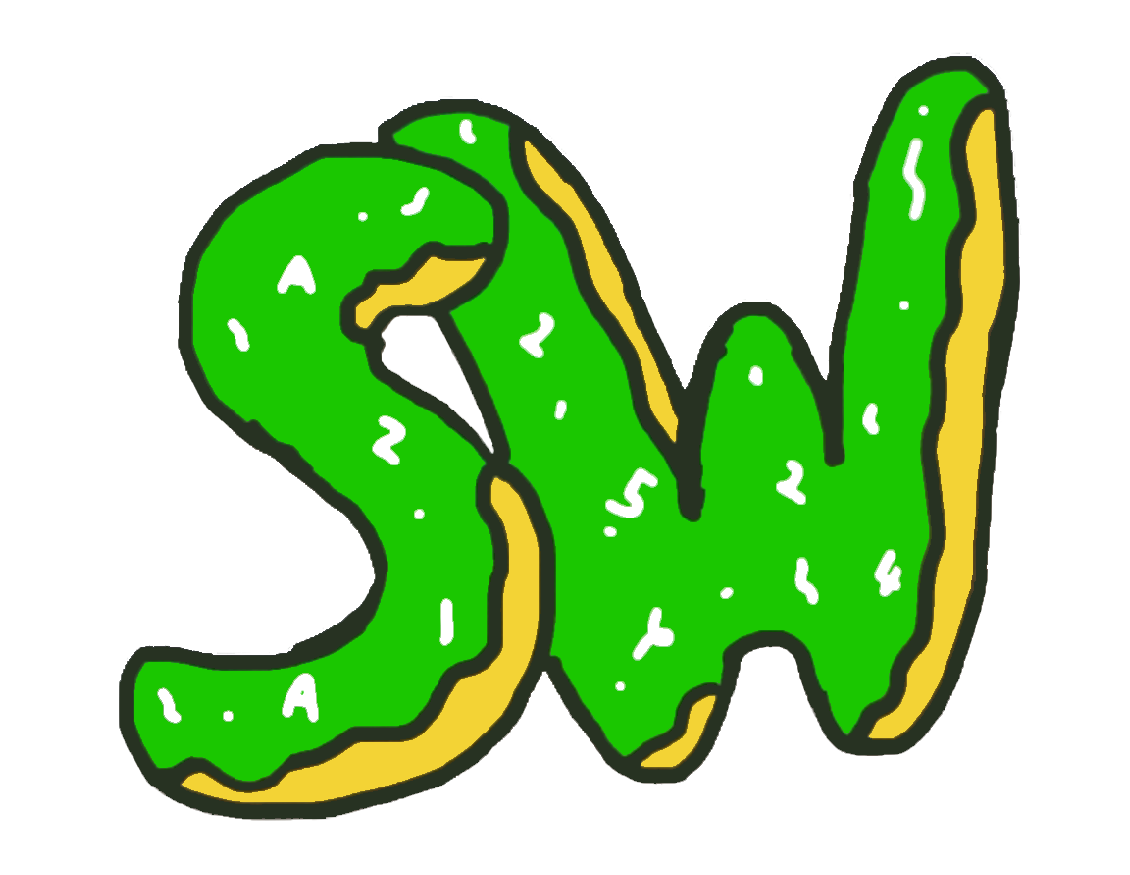

In [4]:
display_large(image)

In [22]:
image[500][500]

array([243, 211,  53, 255], dtype=uint8)

In [21]:
ilist = image.tolist()

In [83]:
# main_colors = [
#     [93, 194, 57],
#     [41, 49, 35],
#     [238, 210, 87],
#     [255, 255, 255]
# ]
main_colors = [
    [26, 199, 0],
    [39, 50, 34],
    [255, 255, 255],
    [243, 211, 53]
]

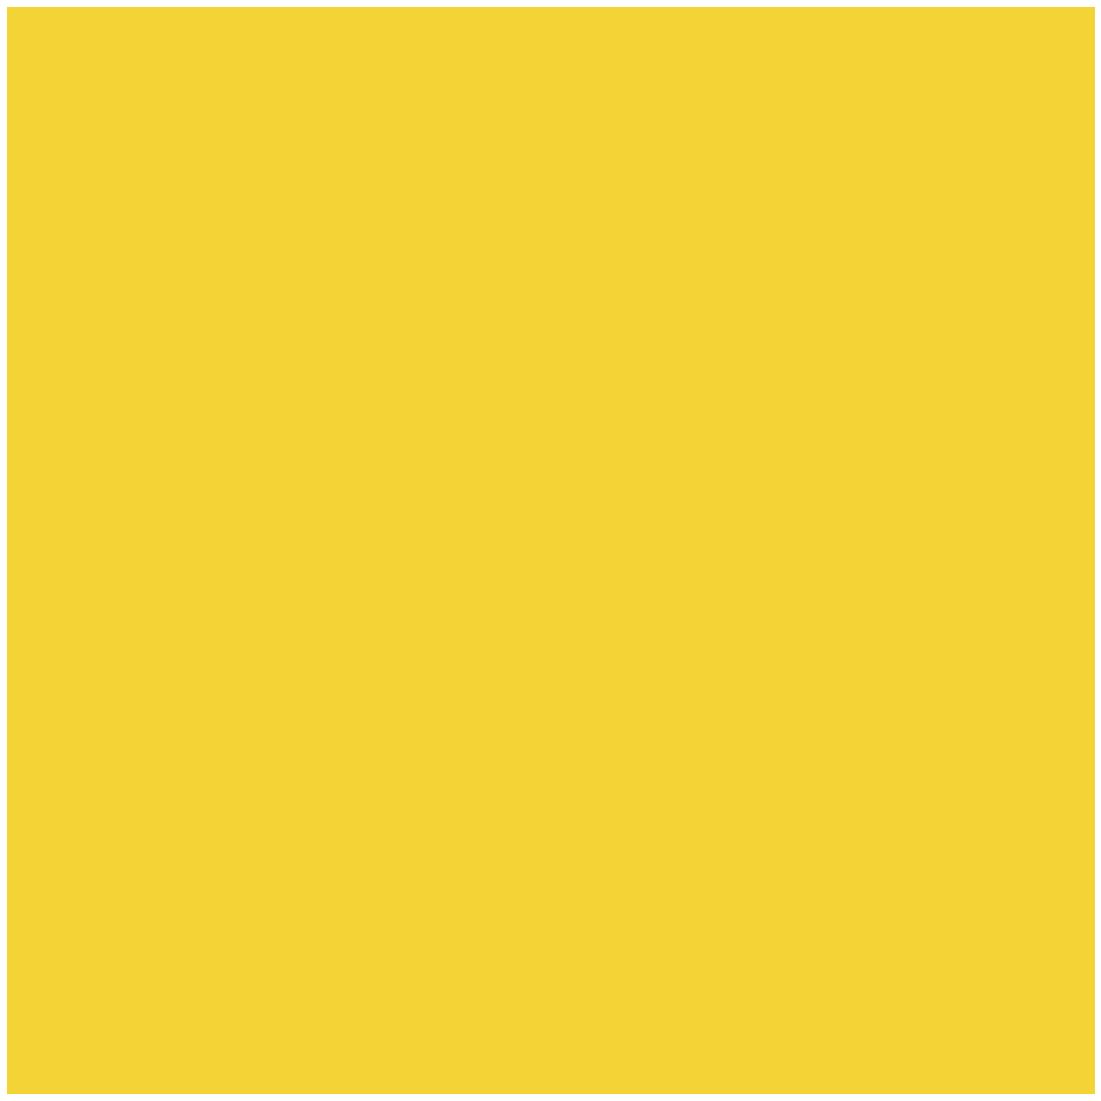

In [25]:
display_large([[image[500][500]]])

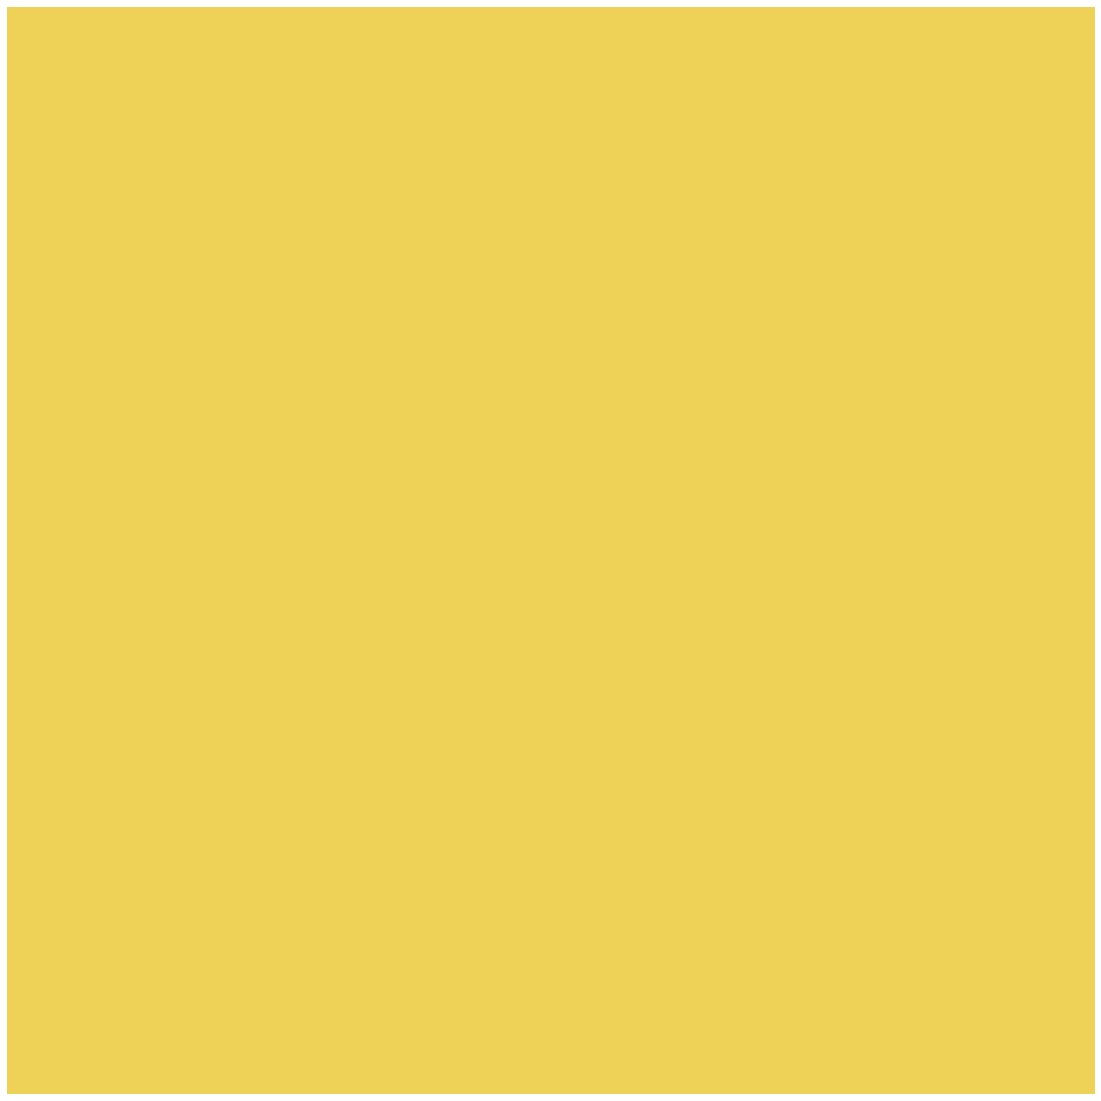

In [78]:
display_large([[[238, 210, 87]]])

In [60]:
for row in range(image.shape[0]):
    for col in range(image.shape[1]):
        if image[row][col][3] > 0:
            image[row][col][3] = 255

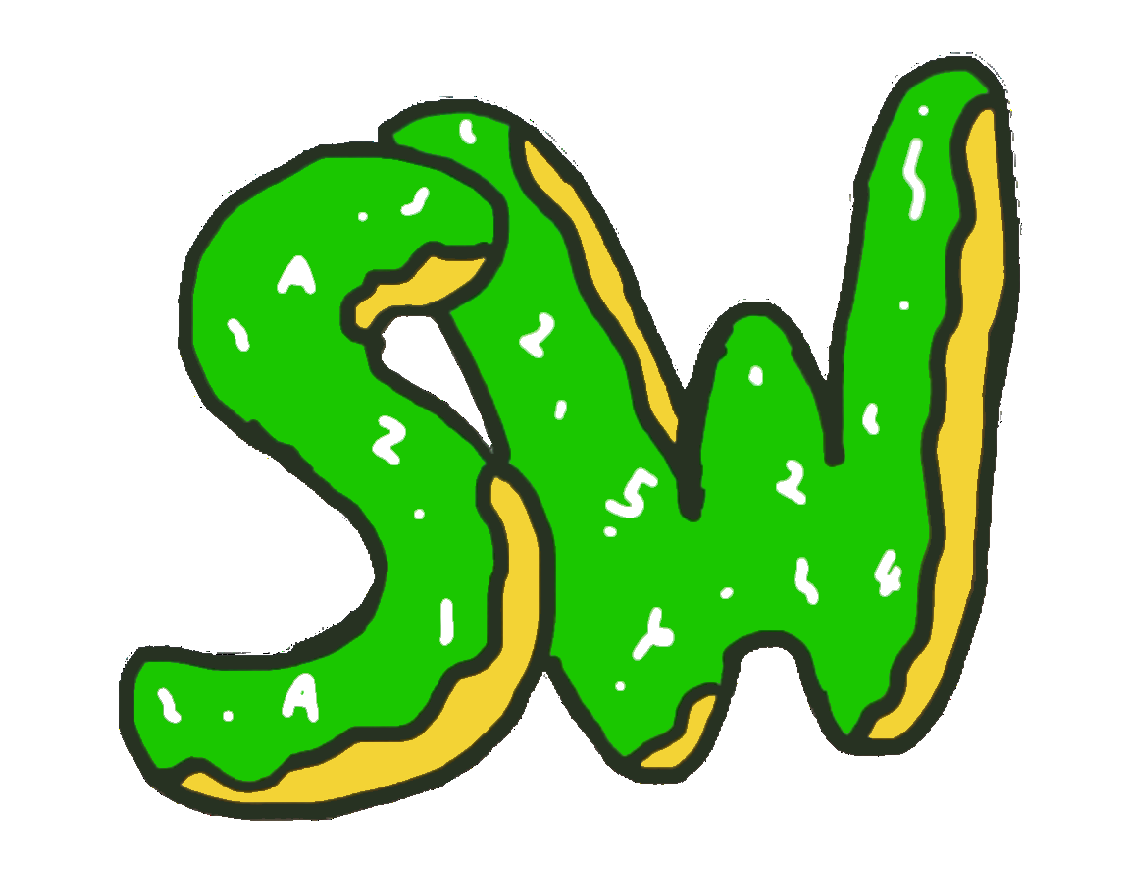

In [61]:
display_large(image)

In [34]:
import math
import copy
def color_dist(pix, color):
    return math.sqrt((pix[0]-color[0])**2 + (pix[1]-color[1])**2 + (pix[2]-color[2])**2)

In [90]:
image2 = copy.copy(image)
for row in range(image.shape[0]):
    for col in range(image.shape[1]):
        if [image2[row][col][0:3]] not in main_colors and image2[row][col][3] != 0:
            pix = image2[row][col]
            distances = [color_dist(pix, main_colors[0]),
                         color_dist(pix, main_colors[1]),
                         color_dist(pix, main_colors[2]),
                         color_dist(pix, main_colors[3])]
            color_idx = np.argmin(distances)
            if color_idx == 3:
                pix = image2[row][col+8][0:3]
                distances2 = [color_dist(pix, main_colors[0]),
                              color_dist(pix, main_colors[1]),
                              color_dist(pix, main_colors[2]),
                              color_dist(pix, main_colors[3])]
                pix = image2[row][col-3][0:3]
                distances3 = [color_dist(pix, main_colors[0]),
                              color_dist(pix, main_colors[1]),
                              color_dist(pix, main_colors[2]),
                              color_dist(pix, main_colors[3])]
                if np.argmin(distances2) in [0,2] or np.argmin(distances3) in [0,2]:
                    color_idx = np.argmin(distances[0:3])
            image2[row][col][0:3] = main_colors[color_idx]

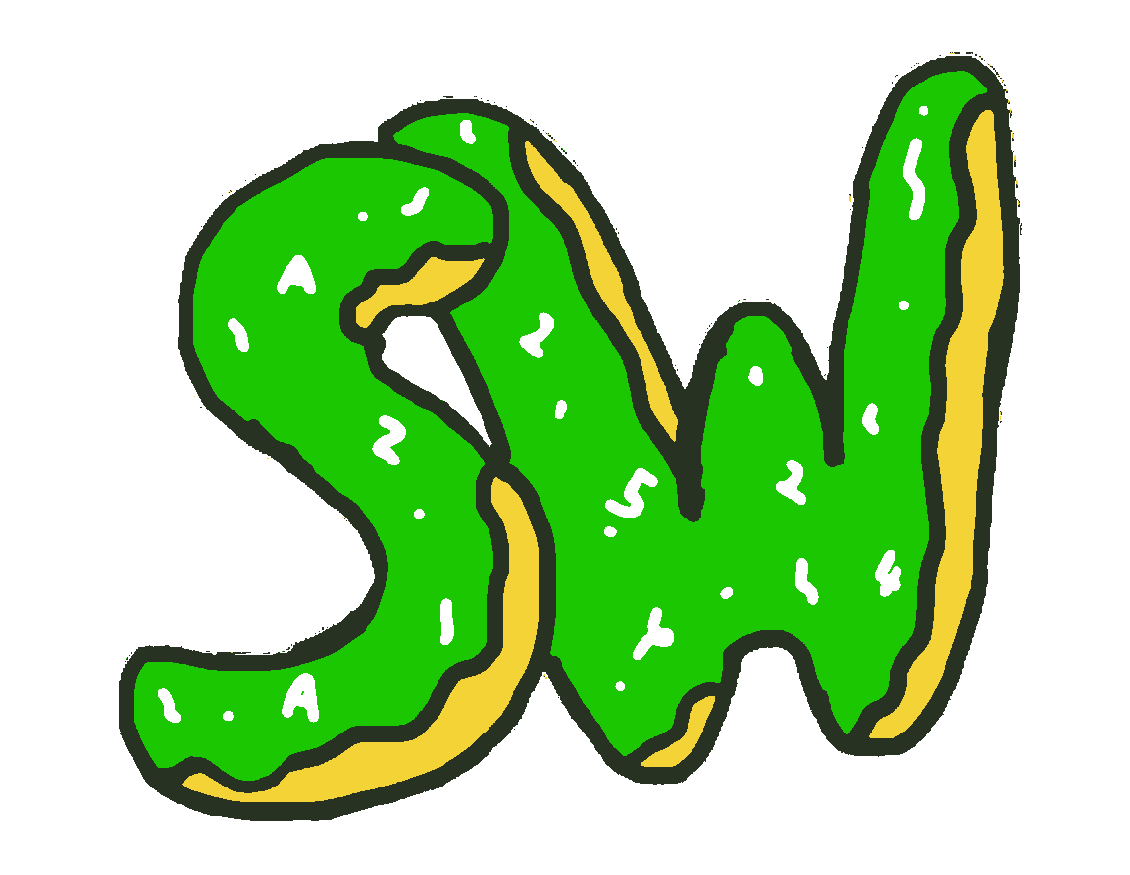

In [91]:
display_large(image2)

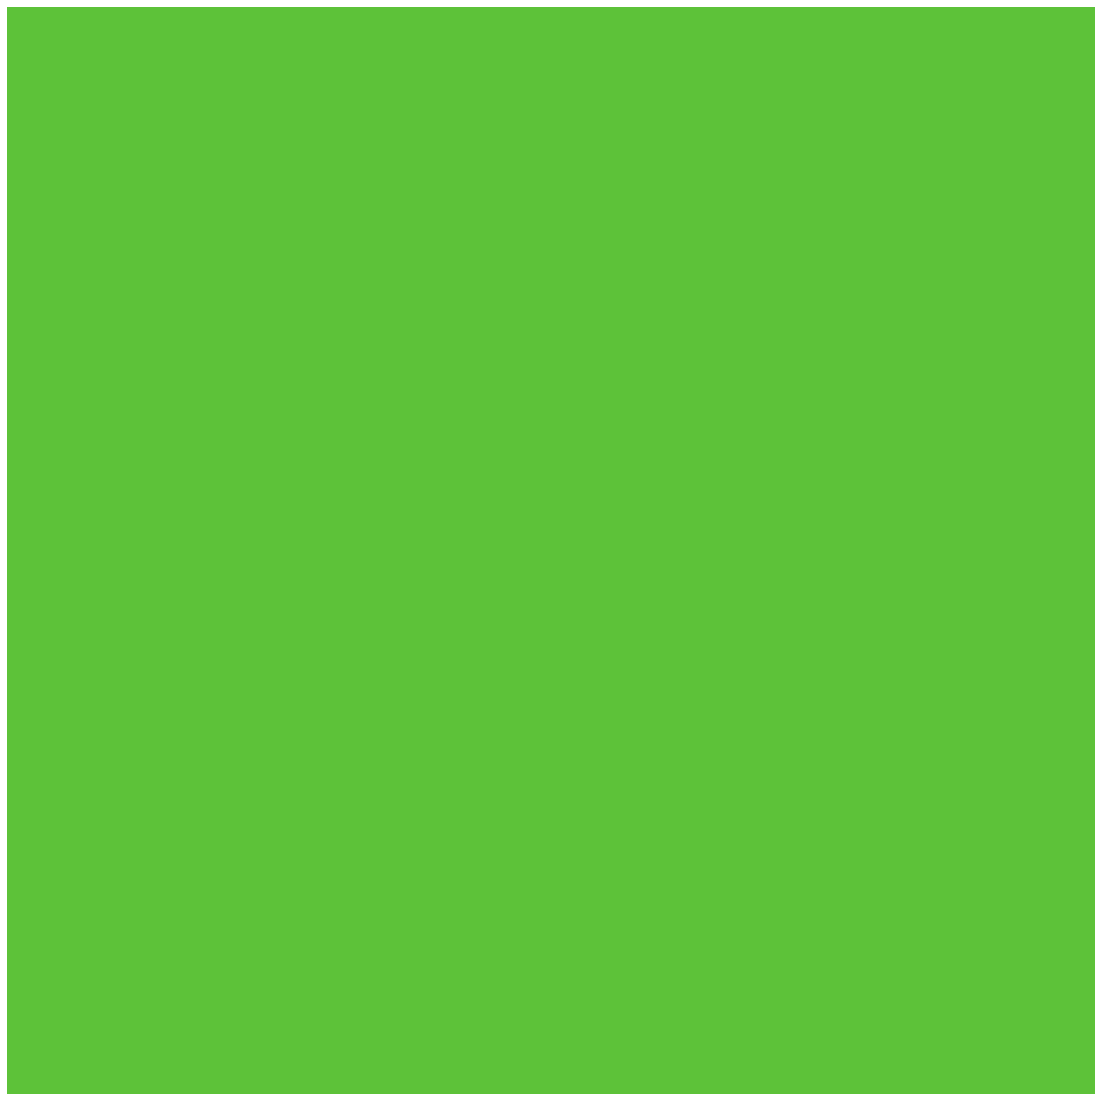

In [56]:
display_large([[[93, 194, 57]]])

In [38]:
image2[300,300]

array([ 93, 194,  57, 255], dtype=uint8)

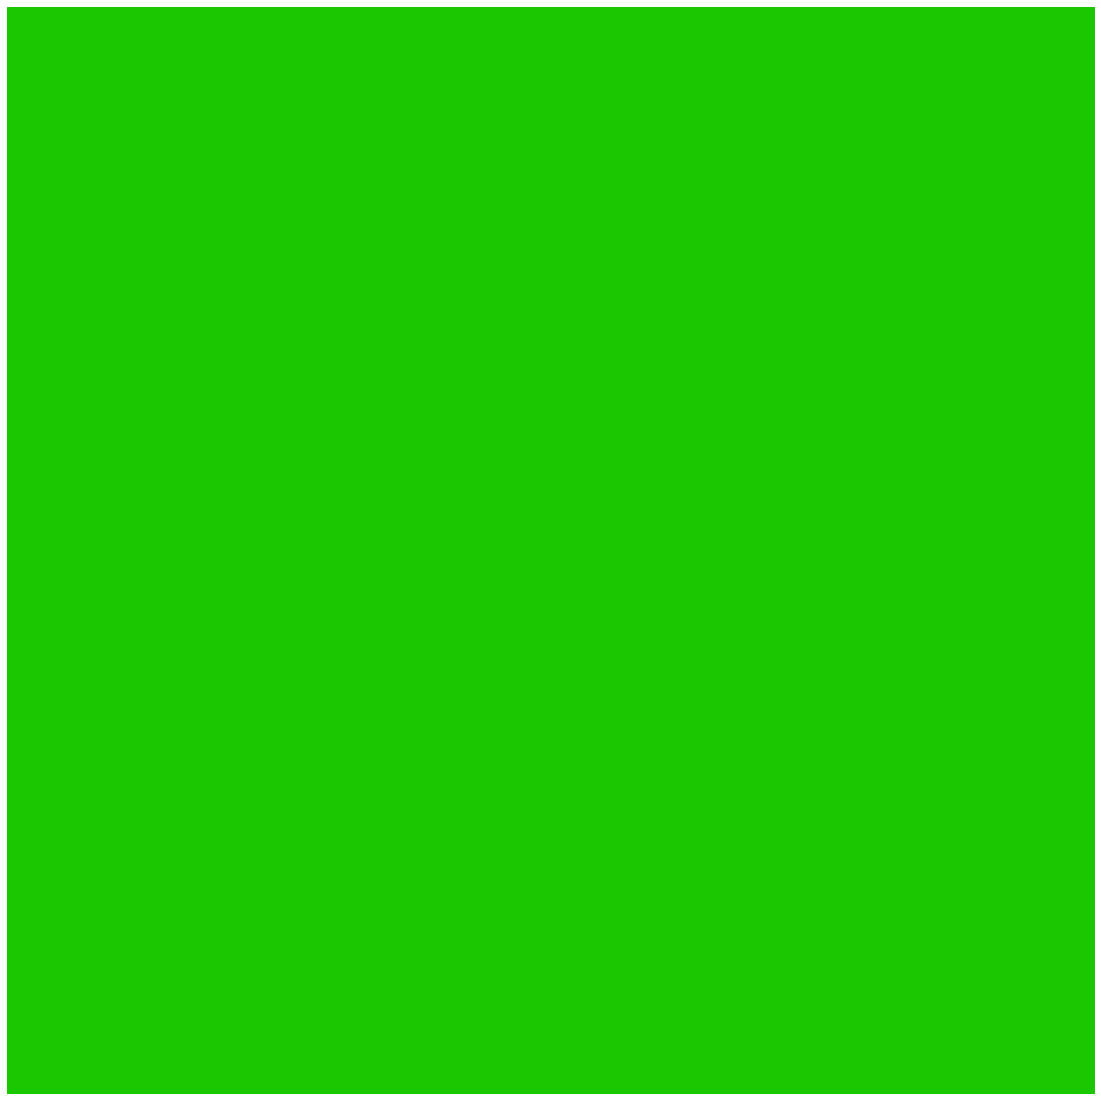

In [76]:
display_large([[image[300,300]]])

In [72]:
image[300,301]

array([ 26, 199,   0, 255], dtype=uint8)

In [73]:
image[300,302]

array([ 26, 199,   0, 255], dtype=uint8)

In [ ]:
image[300,300]

In [43]:
np.unique(image)

TypeError: _unique_dispatcher() got an unexpected keyword argument 'dim'

In [44]:
image.shape

(878, 1138, 4)

In [92]:
rimage = np.reshape(image2, (878*1138, 4))

In [93]:
print(np.unique(rimage, axis=0))

[[  0   0   0   0]
 [ 26 199   0 255]
 [ 39  50  34 255]
 [243 211  53 255]
 [255 255 255 255]]


In [94]:
io.imsave('~/Downloads/SWnograds.png', image2)

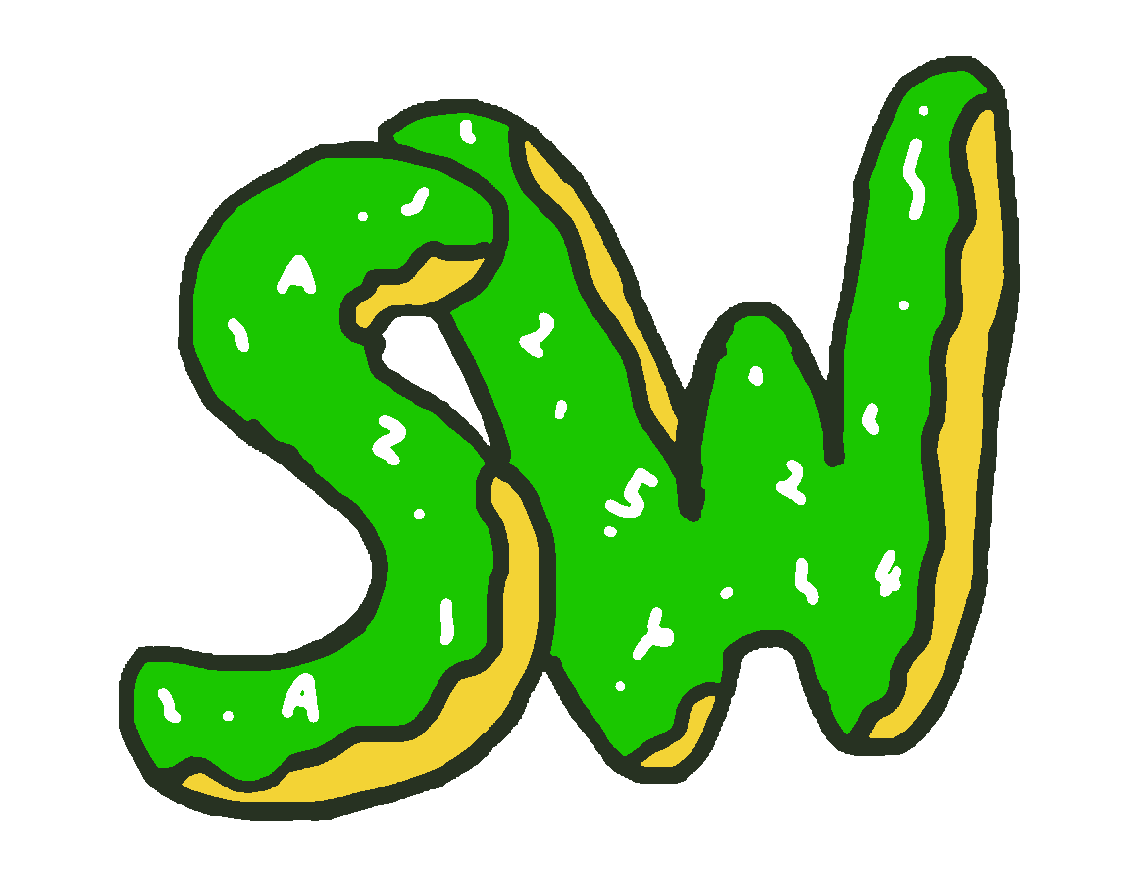

In [95]:
image3 = load('~/Downloads/psSWnograds.png')
display_large(image3)

In [96]:
rimage = np.reshape(image3, (878*1138, 4))
print(np.unique(rimage, axis=0))

[[  0   0   0   0]
 [ 26 199   0 255]
 [ 39  50  34   0]
 [ 39  50  34 248]
 [ 39  50  34 255]
 [243 211  53 255]
 [255 255 255   0]
 [255 255 255 255]]


In [97]:
for row in range(image.shape[0]):
    for col in range(image.shape[1]):
        if image3[row][col][3] == 0 and image3[row][col][1] != 0:
            image3[row][col][0:3] = [0,0,0]

In [98]:
rimage = np.reshape(image3, (878*1138, 4))
print(np.unique(rimage, axis=0))

[[  0   0   0   0]
 [ 26 199   0 255]
 [ 39  50  34 248]
 [ 39  50  34 255]
 [243 211  53 255]
 [255 255 255 255]]


In [99]:
for row in range(image.shape[0]):
    for col in range(image.shape[1]):
        if image3[row][col][3] > 0 and image3[row][col][3] != 255:
            image3[row][col][3] = 255

In [100]:
rimage = np.reshape(image3, (878*1138, 4))
print(np.unique(rimage, axis=0))

[[  0   0   0   0]
 [ 26 199   0 255]
 [ 39  50  34 255]
 [243 211  53 255]
 [255 255 255 255]]


In [103]:
image4 = copy.copy(image3)
image4[image4[:,:,1]==50] = [20,25,17,255]

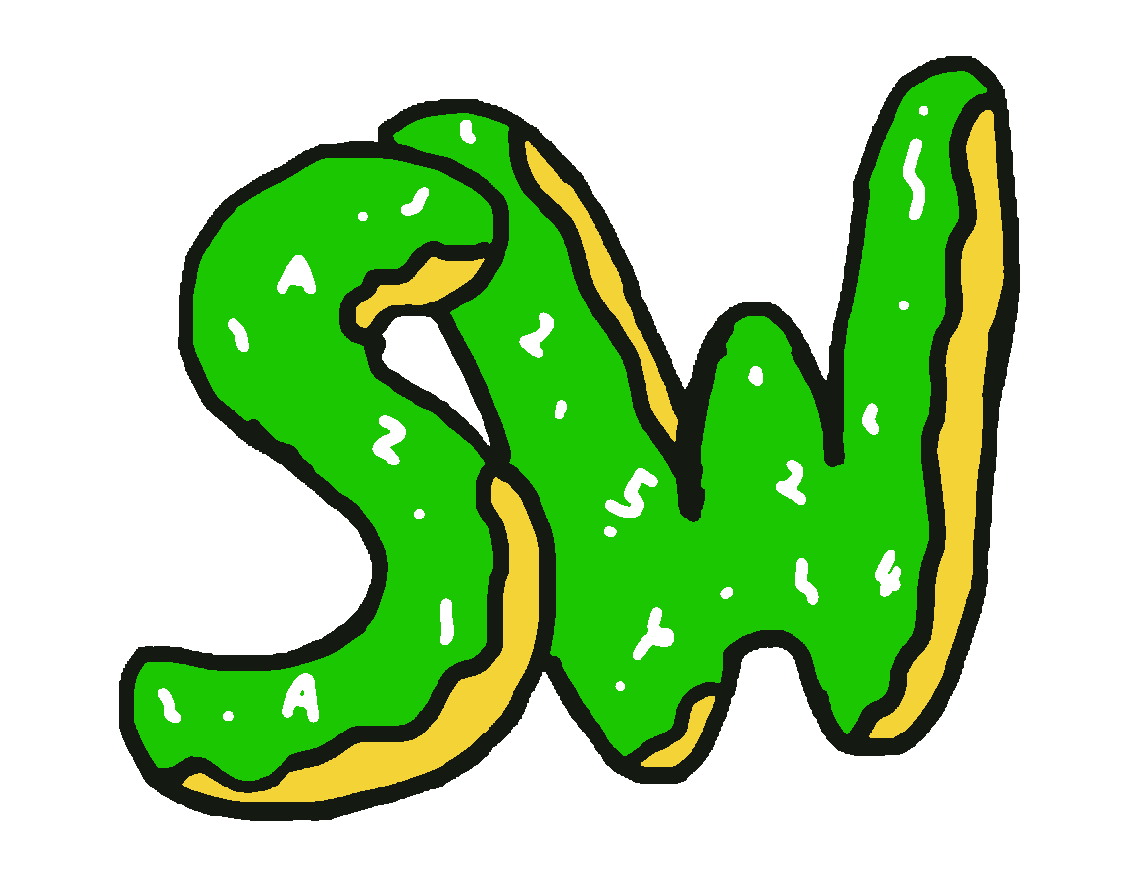

In [106]:
display_large(image4)

In [109]:
rimage = np.reshape(image4, (878*1138, 4))
print(np.unique(rimage, axis=0))

[[  0   0   0   0]
 [ 20  25  17 255]
 [ 26 199   0 255]
 [243 211  53 255]
 [255 255 255 255]]


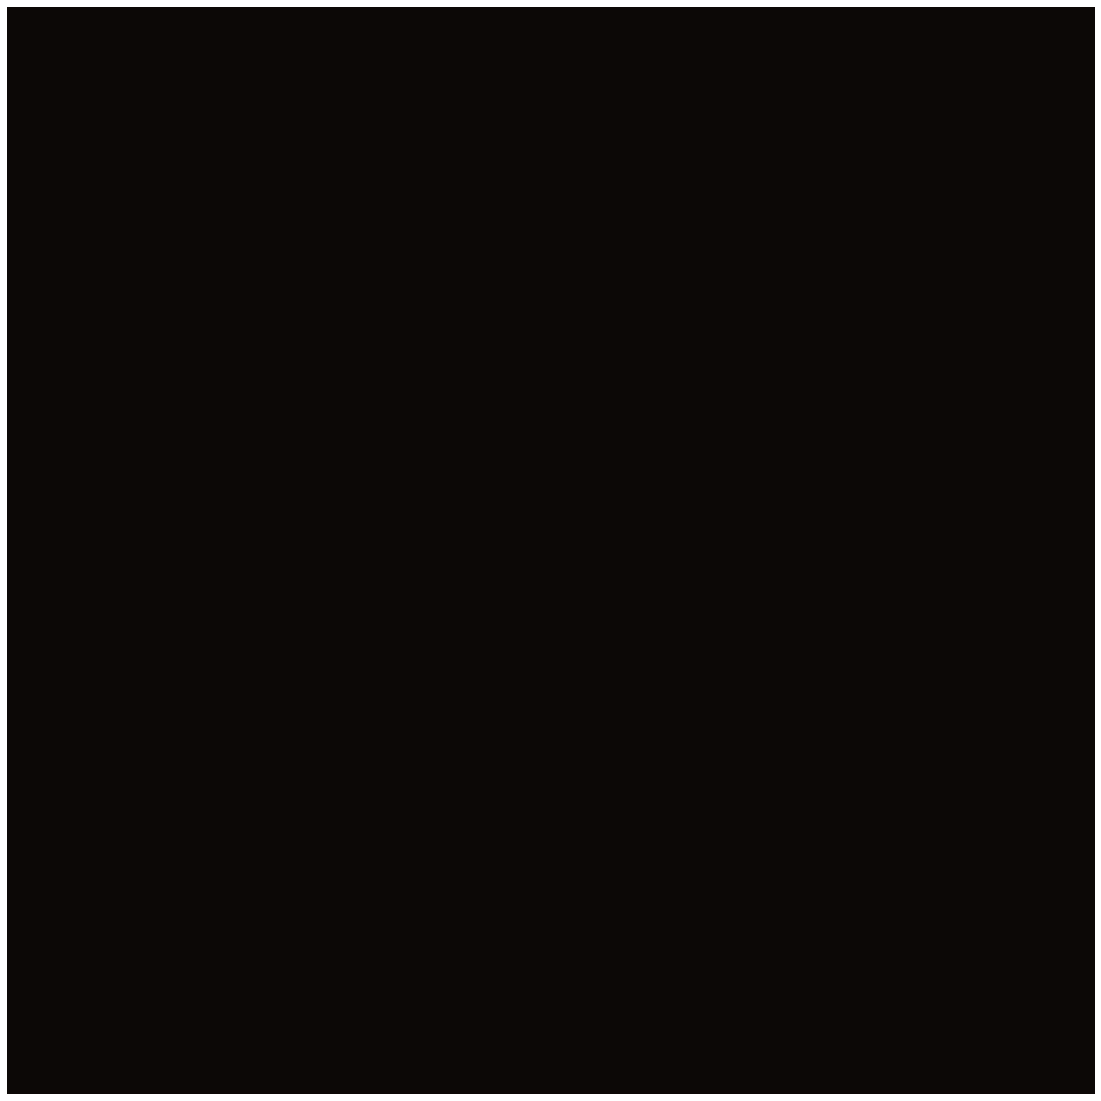

In [105]:
display_large([[[12,8,6]]])

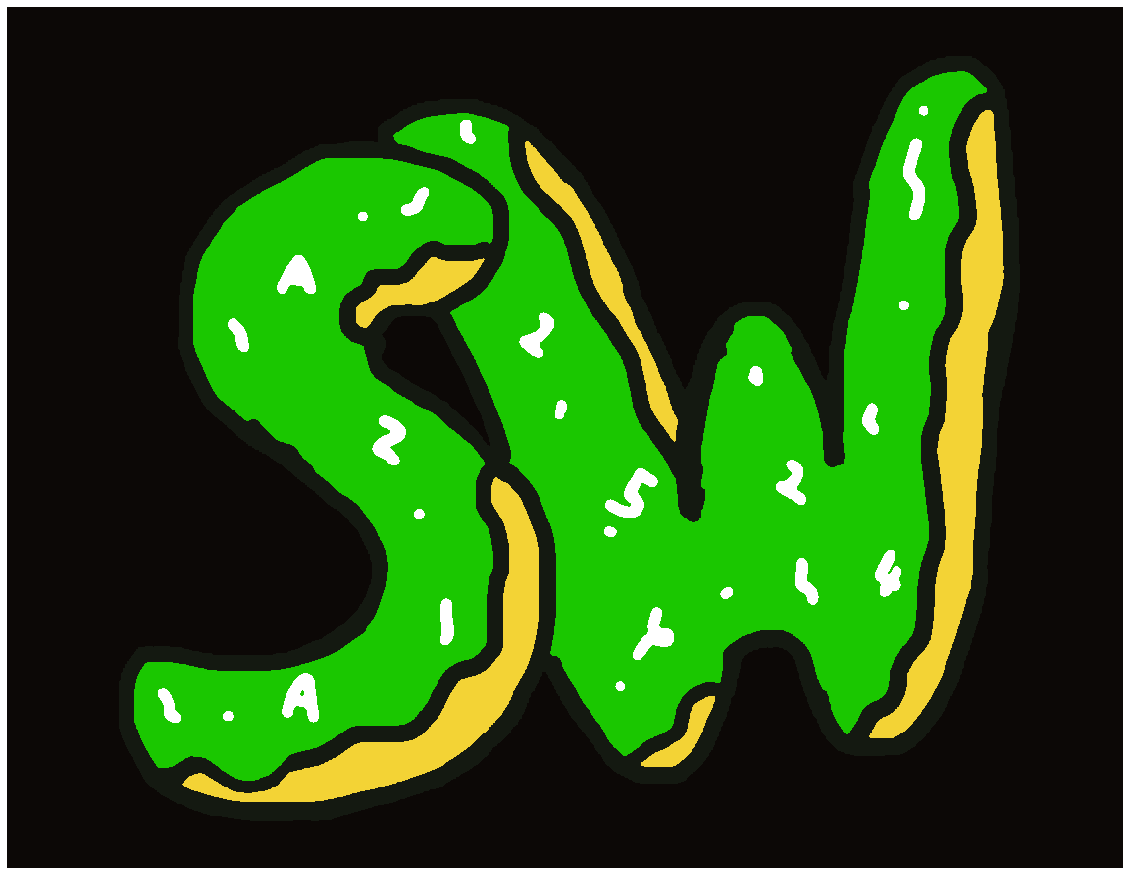

In [107]:
image5 = copy.copy(image4)
image5[image5[:,:,3]==0] = [12,8,6,255]
display_large(image5)

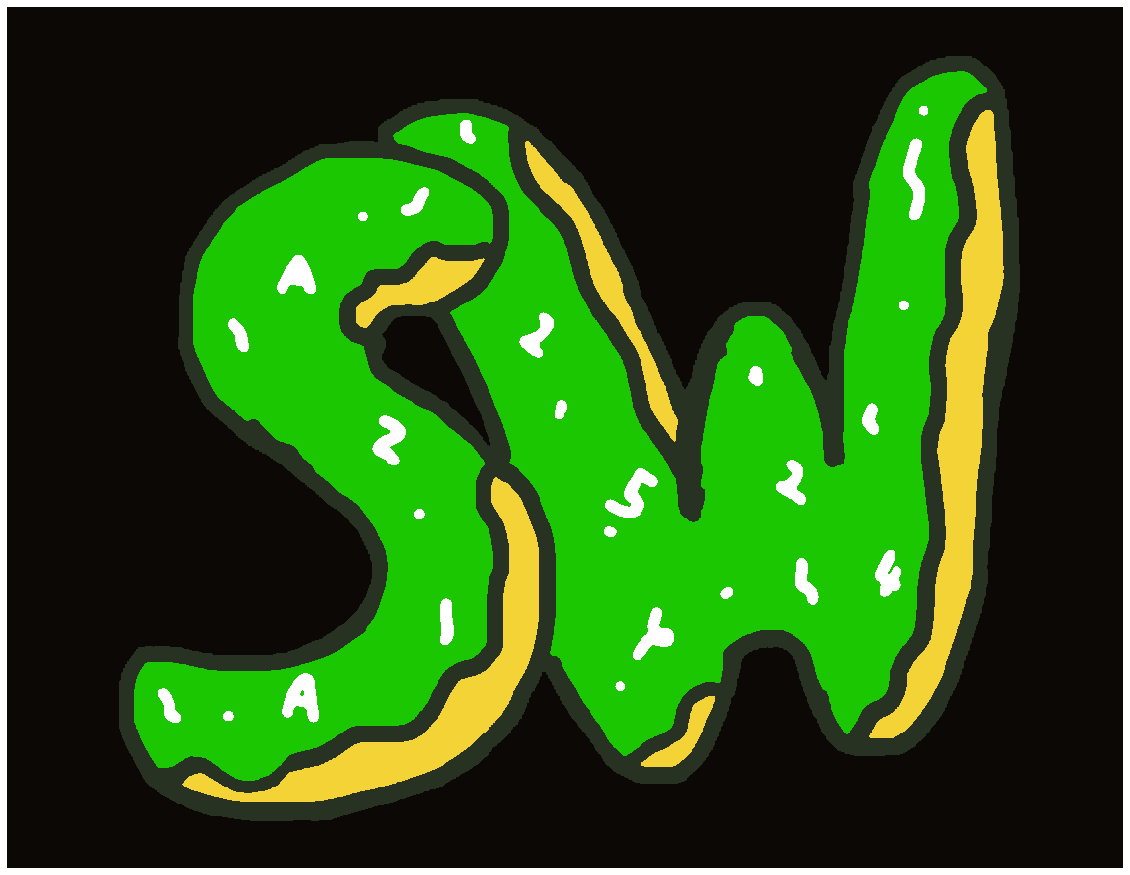

In [108]:
image6 = copy.copy(image3)
image6[image6[:,:,3]==0] = [12,8,6,255]
display_large(image6)

In [110]:
io.imsave('~/Downloads/finalSW.png', image4)

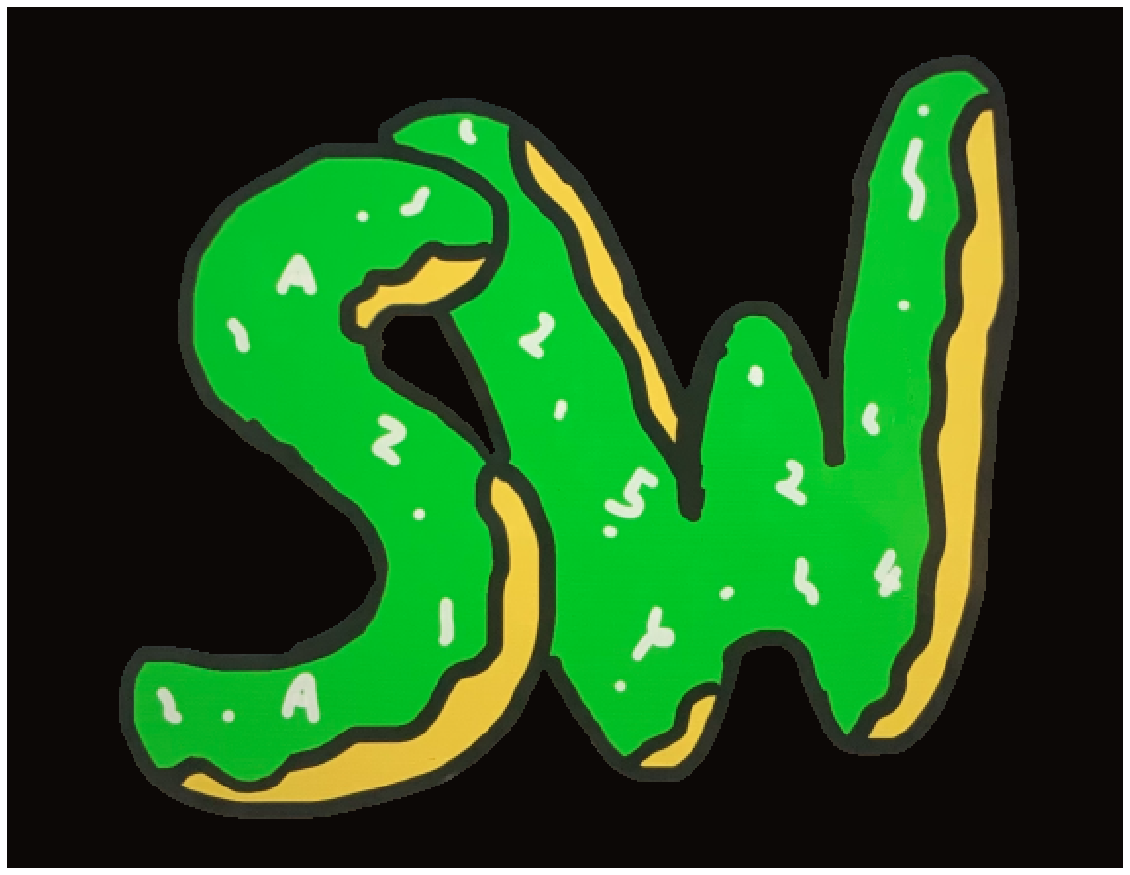

In [113]:
image7 = load('~/Downloads/Screen_Shot_2021-09-13_at_10.22.02_PM-removebg-preview.png')
image7[image7[:,:,3]<255] = [12,8,6,255]
display_large(image7)